In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df=pd.read_csv("linkdin_job_data.csv")

In [3]:
#reading data
df.head(2)

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN


In [4]:
#exploratory data analysis
df.columns

Index(['job_ID', 'job', 'location', 'company_id', 'company_name', 'work_type',
       'full_time_remote', 'no_of_employ', 'no_of_application',
       'posted_day_ago', 'alumni', 'Hiring_person', 'linkedin_followers',
       'hiring_person_link', 'job_details', 'Column1'],
      dtype='object')

In [5]:
#dropping unwanted columns
df=df.drop(['company_id','Column1'],axis=1)

In [6]:
#getting info on columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_ID              7927 non-null   int64 
 1   job                 7894 non-null   object
 2   location            7894 non-null   object
 3   company_name        7892 non-null   object
 4   work_type           7736 non-null   object
 5   full_time_remote    7848 non-null   object
 6   no_of_employ        7603 non-null   object
 7   no_of_application   7887 non-null   object
 8   posted_day_ago      7920 non-null   object
 9   alumni              4858 non-null   object
 10  Hiring_person       5720 non-null   object
 11  linkedin_followers  4814 non-null   object
 12  hiring_person_link  5720 non-null   object
 13  job_details         7881 non-null   object
dtypes: int64(1), object(13)
memory usage: 867.1+ KB


In [7]:
#checking for null values
df.isnull().sum()

job_ID                   0
job                     33
location                33
company_name            35
work_type              191
full_time_remote        79
no_of_employ           324
no_of_application       40
posted_day_ago           7
alumni                3069
Hiring_person         2207
linkedin_followers    3113
hiring_person_link    2207
job_details             46
dtype: int64

In [8]:
#droppping null values
df=df.dropna(subset=['job'])

In [9]:
# Specify columns to convert to numeric
columns_to_convert = ['no_of_application']

# Convert specified columns to numeric, coercing errors to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows containing non-numeric values in the specified columns
df = df.dropna(subset=columns_to_convert)


In [10]:
#type conversion
df['no_of_application'] = df['no_of_application'].astype(float)
df.dtypes

job_ID                  int64
job                    object
location               object
company_name           object
work_type              object
full_time_remote       object
no_of_employ           object
no_of_application     float64
posted_day_ago         object
alumni                 object
Hiring_person          object
linkedin_followers     object
hiring_person_link     object
job_details            object
dtype: object

In [11]:
df['job_details'] = df['job_details'].astype(str)
df.dtypes

job_ID                  int64
job                    object
location               object
company_name           object
work_type              object
full_time_remote       object
no_of_employ           object
no_of_application     float64
posted_day_ago         object
alumni                 object
Hiring_person          object
linkedin_followers     object
hiring_person_link     object
job_details            object
dtype: object

In [12]:
#working on catogorical data
import re

In [13]:
df['job'] = df['job'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [14]:
#creating top 10 variable
title_counts=df['job'].value_counts()
top_n=10
top_title_counts=title_counts.head(top_n)
application_count=df['no_of_application']
application_top=application_count.head(top_n)

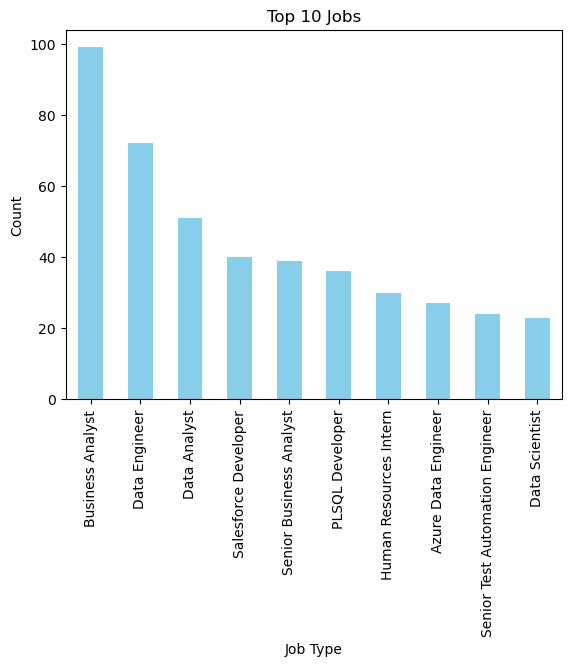

In [15]:
#creating top 10 most searched jobs in linkdin
top_title_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Top 10 Jobs')
plt.show()

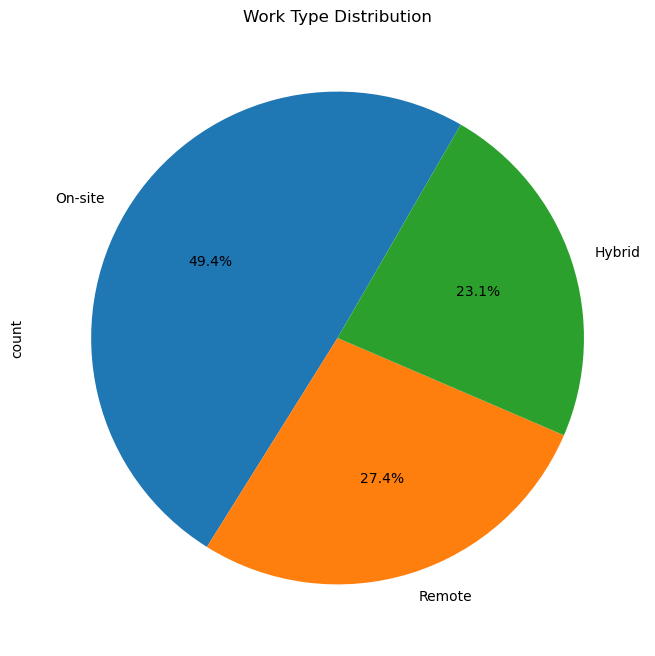

In [16]:
#pie chat for type of work most preferred
plt.figure(figsize=(8, 8))
df['work_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Work Type Distribution')
plt.show()

In [17]:
top_10_df = df.nlargest(20, 'no_of_application')

In [18]:
bottom_10_df=df.nsmallest(20,'no_of_application')

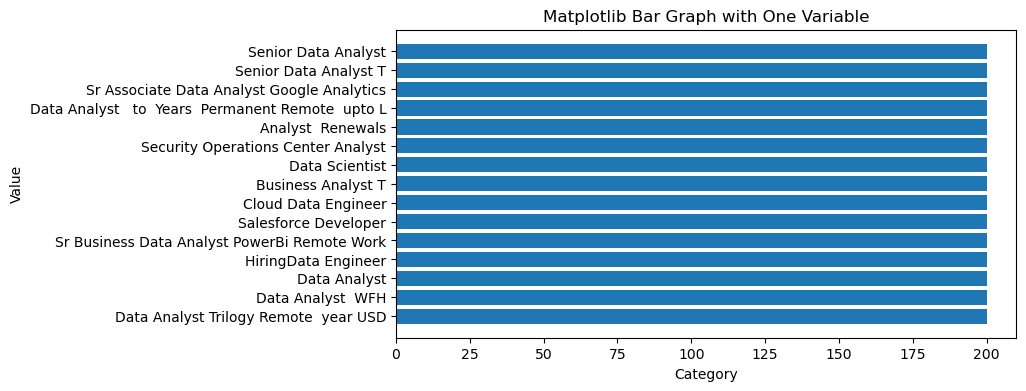

In [19]:
#top 10 jobs with no of applications received
plt.figure(figsize=(8, 4))
plt.barh(top_10_df['job'], top_10_df['no_of_application'])
plt.title('Matplotlib Bar Graph with One Variable')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()


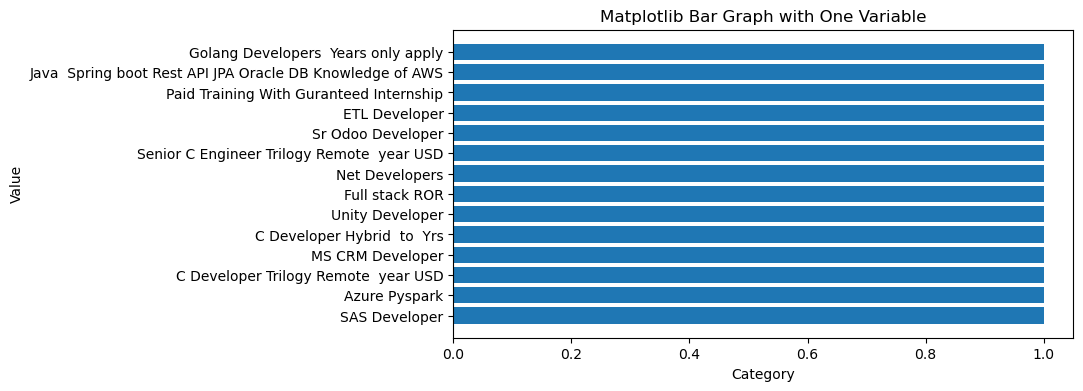

In [20]:
#bottom 10 jobs with number of applications received
plt.figure(figsize=(8, 4))
plt.barh(bottom_10_df['job'], bottom_10_df['no_of_application'])
plt.title('Matplotlib Bar Graph with One Variable')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()


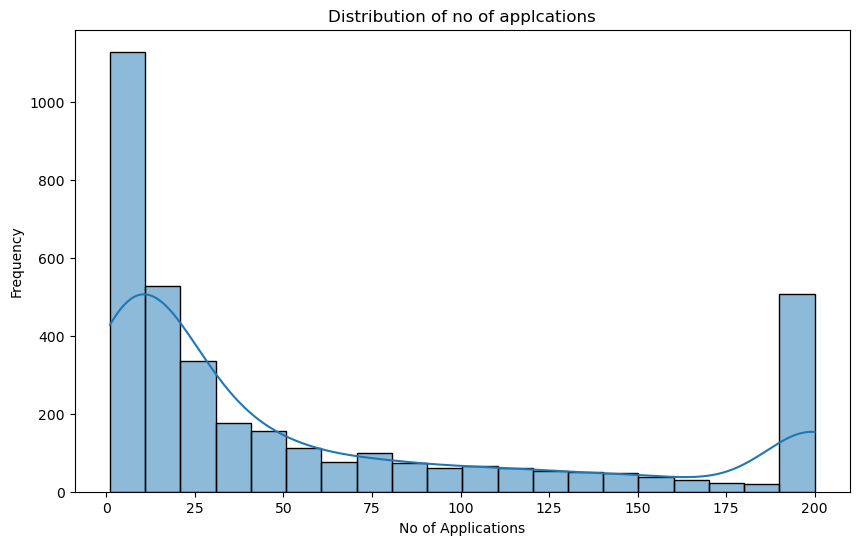

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['no_of_application'], bins=20, kde=True)
plt.title('Distribution of no of applcations')
plt.xlabel('No of Applications')
plt.ylabel('Frequency')
plt.show()


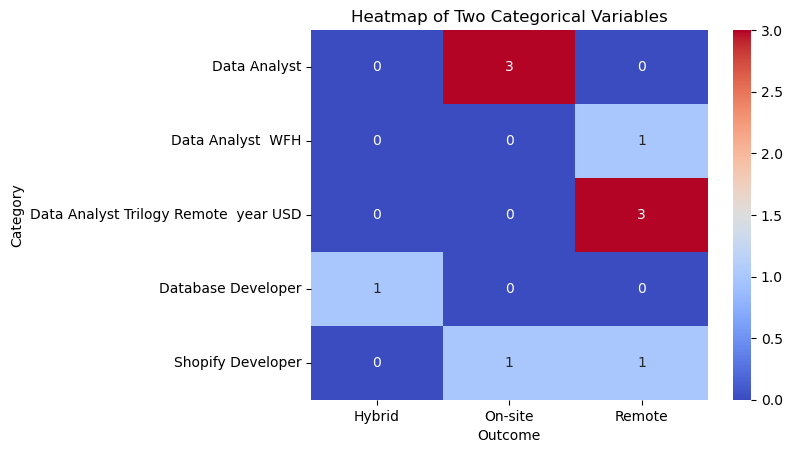

In [22]:
# Create a crosstab to count occurrences
ct = pd.crosstab(df['job'].head(10), df['work_type'])

# Plot a heatmap
sns.heatmap(ct, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Outcome')
plt.ylabel('Category')
plt.title('Heatmap of Two Categorical Variables')
plt.show()

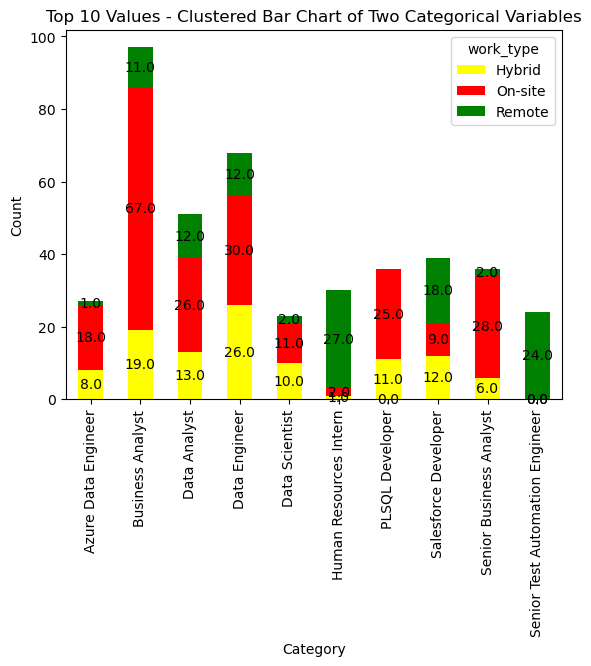

In [23]:
top_categories = df['job'].value_counts().head(10).index

# Filter the DataFrame for the top 10 values
df_top = df[df['job'].isin(top_categories)]

# Create a crosstab to count occurrences
ct = pd.crosstab(df_top['job'], df_top['work_type'])
ax=ct.plot(kind='bar', stacked=True, color=['yellow', 'red','green'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Values - Clustered Bar Chart of Two Categorical Variables')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height}', ha='center', va='center')

plt.show()

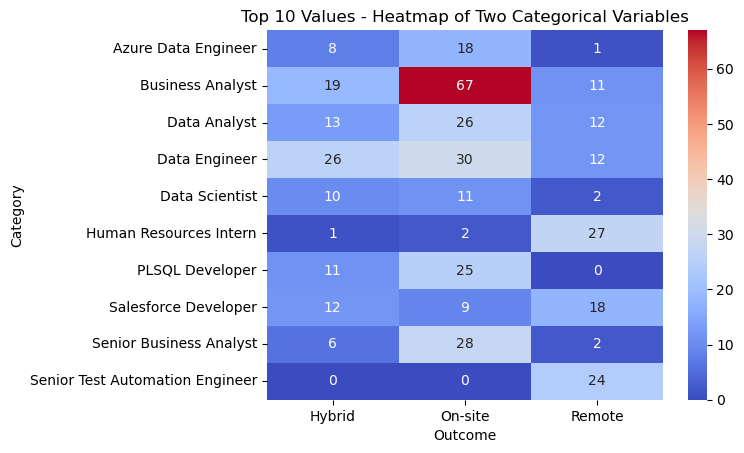

In [24]:
top_categories = df['job'].value_counts().head(10).index

# Filter the DataFrame for the top 10 values
df_top = df[df['job'].isin(top_categories)]

# Create a crosstab to count occurrences
ct = pd.crosstab(df_top['job'], df_top['work_type'])

# Plot a heatmap
sns.heatmap(ct, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Outcome')
plt.ylabel('Category')
plt.title('Top 10 Values - Heatmap of Two Categorical Variables')
plt.show()

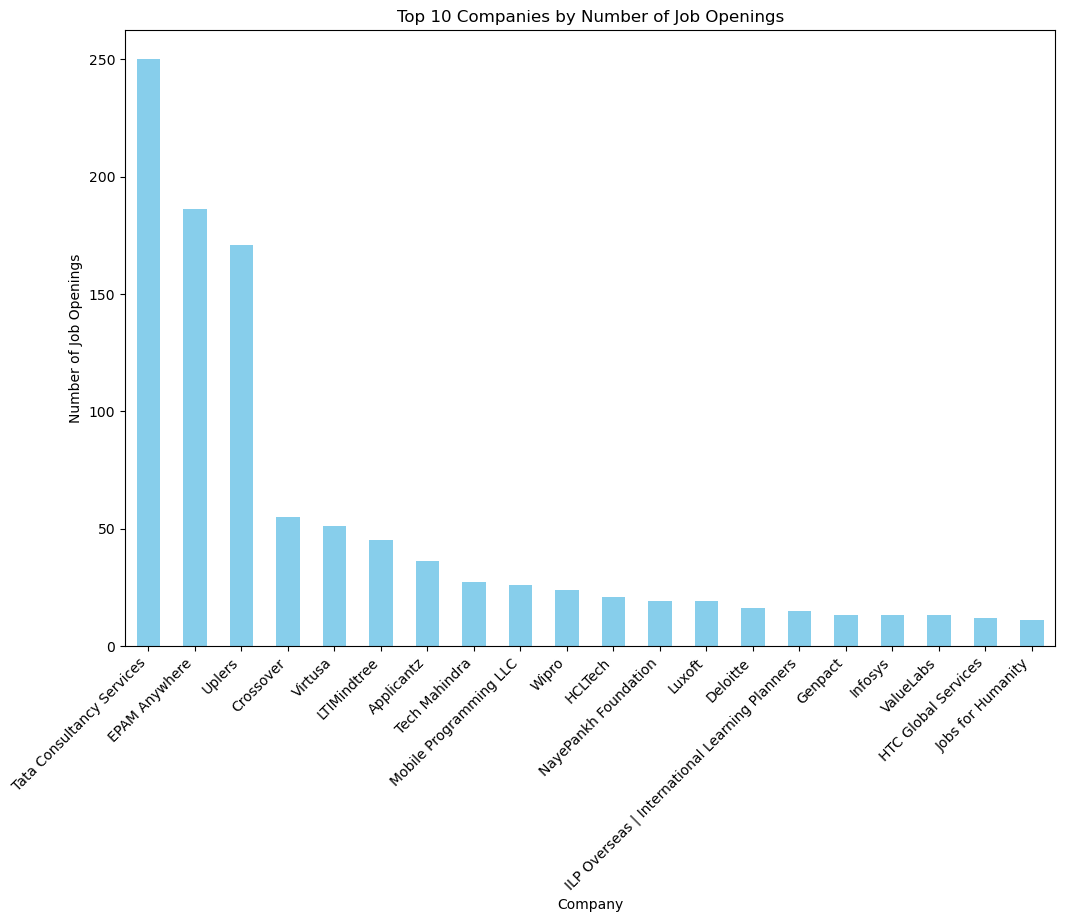

In [25]:
#top 10 comapnies with most job roles posted in linkdin
top_companies = df['company_name'].value_counts().head(20)
plt.figure(figsize=(12, 8))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies by Number of Job Openings')
plt.xlabel('Company')
plt.ylabel('Number of Job Openings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
#creating wordcloud to see what are important terms to consider in job details
from wordcloud import WordCloud
import nltk

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['processed_text'] = df['job_details'].apply(preprocess_text)


In [ ]:
# Combine all text into a single string
text_combined = ' '.join(df['processed_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(text_combined)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

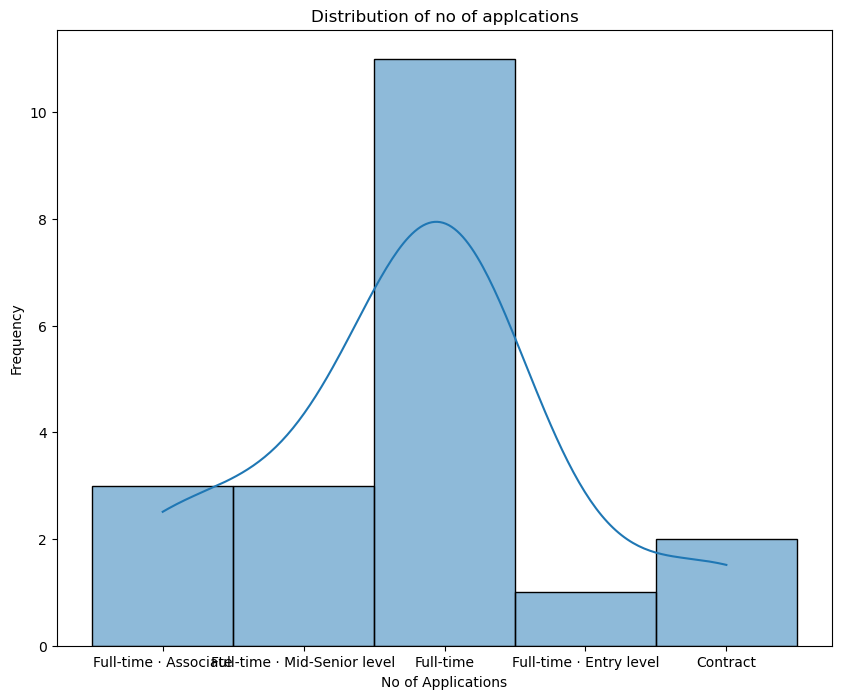

In [27]:
plt.figure(figsize=(10, 8))
sns.histplot(df['full_time_remote'].head(20), bins=20, kde=True)
plt.title('Distribution of no of applcations')
plt.xlabel('No of Applications')
plt.ylabel('Frequency')
plt.show()